<a href="https://colab.research.google.com/github/GEJ1/web-scraping-python/blob/main/web_scraping_maestria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web scraping con Python**


#### *Material complementario a la clase dictada por [Gustavo Juantorena](https://github.com/GEJ1) como docente invitado en la materia <b>Text Mining</b> de la  [Maestría en Explotación de Datos y Descubrimiento de Conocimiento](http://datamining.dc.uba.ar/datamining/) de la Universidad de Buenos Aires.*
#### [Slides de la clase](https://docs.google.com/presentation/d/10-lc2Y6kMVHp7FO9v8ReZdY1MPwUlgxWIsSDePY0afg/edit?usp=sharing)

*Las partes del código que no son mias tienen las atribuciones correspondientes*

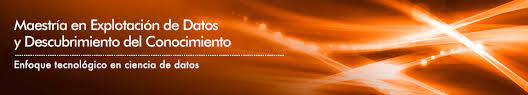

### **Importante**: Los cambios que hagan en este cuaderno de Colab no se guardarán, lo ideal sería que hagan una copia del mismo en sus respectivos Google Drives de la siguiente forma:

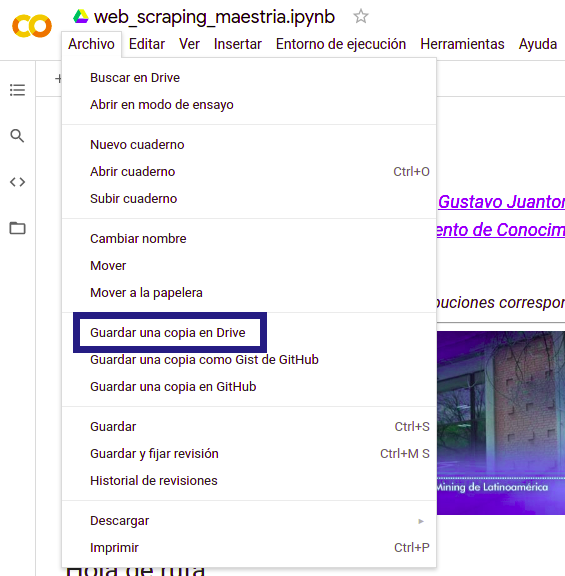

# **Hoja de ruta**


## 1. Pedidos HTTP con **urllib** y **Requests**
## 2. Uso basico de **APIs**
## 3. Parseo con **Beautiful Soup**






# **Pedidos HTTP con urllib y Requests**

In [ ]:
# Para hacer pedidos mediante el protocolo HTTP
import requests

In [ ]:
# Hacemos un pedido a la página de wikipedia
URL = 'https://www.wikipedia.org'

# Guardamos el objeto que nos devuelve
response = requests.get(URL)

print(f'Tipo de Objeto: {type(response)} \n')
print(f'Status code: {response.status_code} \n')
print(f'Data: {response.content} \n')

## También podemos usar la libreria Requests

### Ejemplo de scrapeo de imágenes

In [ ]:
# Importamos
import requests

# defino la URL
image_url = 'https://i.pinimg.com/564x/37/be/0a/37be0afe05a46e4c45bdcb443032b3fa.jpg'

# Hago una peticion y guardo la respuesta
image_response = requests.get(image_url)

# Accedemos al contenido de la imagen en bytes
image_response_content = image_response.content

print(f'Este es el contenido en bytes: \n {image_response_content}')

In [ ]:
# Importamos librerias para manejar imagenes (no tienen nada que ver con el scrapeo)
from PIL import Image
from io import BytesIO

# Mostramos la imagen
image_from_url = Image.open(BytesIO(image_response_content))
print('Esta imagen la bajamos de internet usando Python! \n ')
image_from_url

In [ ]:
# Para guardarla
image_from_url.save("imagen.png","PNG")

### Headers

breve comentario, puede llegar a ser útil

In [ ]:
# Una serie de datos que acompanan al pedido. Para saber mas: https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers

url = 'https://exactas.uba.ar/'

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0' # User-Agent da info del sistema operativo, el navegador usado, etc
    }
response = requests.get(url, headers=headers)

# **Uso basico de APIs**

### Uso de API de manera directa

[Sunset and sunrise times API](https://sunrise-sunset.org/api)

**Sirve para obtener la hora del amanecer y el ocaso de un determinado día**

*Parametetros:*


*  **lat** (float): Latitude in decimal degrees. Required.
*  **lng** (float): Longitude in decimal degrees. Required.
*  **date** (string): Date in YYYY-MM-DD format. Also accepts other date formats   and even relative date formats. If not present, date defaults to current date. Optional.
* **callback** (string): Callback function name for JSONP response. Optional.
* **formatted** (integer): 0 or 1 (1 is default). Time values in response will be expressed following ISO 8601 and day_length will be expressed in seconds. Optional.

*Estructura de la query:*

`https://api.sunrise-sunset.org/json?`

`lat=36.7201600`

`&`

`lng=-4.4203400`

`&`

`date=2021-07-26`

In [ ]:
# Definimos los parametros de nuestra query
latitud = -34.6
longitud = -58.4
fecha = '1912-12-23' # YYYY-MM-DD

In [ ]:
# Hacemos el pedido y guardamos la respuesta en una nueva variable
response_sunset = requests.get(f'https://api.sunrise-sunset.org/json?lat={latitud}&lng={longitud}&date={fecha}', verify=False)

In [ ]:
# Para des-serializar el objeto (que era tipo 'HTTPResponse') y cargarlo como json
data_sunset = response_sunset.json()
data_sunset

In [ ]:
#Evaluamos el status del pedido
sunset_status = data_sunset['status']
print(f'Status: {sunset_status} \n')

In [ ]:
# Podemos ver su contenido como si fuera un diccionario:
sunset = data_sunset['results']['sunset']
print(f'El {fecha} el sol se puso a las {sunset} (UTC)\n')

In [ ]:
# tambien podriamos iterar
print("Iterando data_sunset['results']: \n")
for elemento in data_sunset['results']:
  print(elemento)

### Uso de API por medio de una librería: Wikipedia

Wikipedia-API es un wrapper de Python fácil de usar para la API de Wikipedia. Admite la extracción de textos, secciones, enlaces, categorías, traducciones, etc.

Repositorio: https://github.com/martin-majlis/Wikipedia-API

Documentación: https://wikipedia-api.readthedocs.io/en/latest/README.html






In [ ]:
# Instalamos el paquete porque no viene con Colab
!pip3 install wikipedia-api -q

In [ ]:
# Ahora si podemos importarlo
import wikipediaapi

In [ ]:
# Instanciamos la clase wikipediaapi y utilizamos el metodo Wikipedia con el parametro de idioma
user_agent = 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
wiki_wiki = wikipediaapi.Wikipedia(language='es', user_agent=user_agent)

# Usamos el metodo page para y hacemos un pedido con una keyword
page_data_mining = wiki_wiki.page('Minería_de_datos')

print(f'page_data_mining es un objeto de tipo: {type(page_data_mining)}')

page_data_mining es un objeto de tipo: <class 'wikipediaapi.WikipediaPage'>


In [ ]:
# Resumen
page_data_mining.summary

In [ ]:
# Url completa
page_data_mining.fullurl

In [ ]:
# Imprimir las categorias a las que corresponde la pagina con el atributo 'categories'

categories = page_data_mining.categories
for title in sorted(categories.keys()):
    print(title, categories[title])

# **BeautifulSoup**

## Generalidades

In [ ]:
from bs4 import BeautifulSoup
import requests

# Vamos a jugar un poco con la pagina de Exactas
url_base = 'https://exactas.uba.ar/'
endpoint_calendario = 'calendario-academico/'
html_obtenido = requests.get(url_base+endpoint_calendario)
soup = BeautifulSoup(html_obtenido.text, "html.parser")
print(type(soup))
print(soup)
print(soup.prettify())

In [ ]:
# Si queremos quedarnos con un tag
# El método "find" busca el primer elemento de la pagina con ese tag
primer_h3 = soup.find('h3')
# print(primer_h3)

# equivalente a:
print(soup.h3.text)

In [ ]:
# El método "find_all" busca TODOS los elementos de la pagina con ese tag y devuelve una lista que los contiene (en realidad devuelve un objeto de la clase "bs4.element.ResultSet")
h3_todos = soup.find_all('h3')
# print(h3_todos)

# Si usamos el parametro limit = 1, emulamos al metodo find:
h3_uno_solo = soup.find_all('h3',limit=1)
print(h3_uno_solo)

In [ ]:
# podemos iterar sobre el objeto
for fecha in h3_todos[:-1]:
  # Extraemos el texto que se encuentra dentro del tag
  print(fecha.text)

In [ ]:
# Busco por clase, escribo class_ porque "class" es una palabra reservada en Python
eventos_proximos = soup.find('aside', class_ = 'widget_my_calendar_upcoming_widget')
for evento in eventos_proximos:
  print(evento.text)

In [ ]:
# Todos los links. Esto podría ser útil para seguir scrapeando todo el sitio haciendo requests en ellos
a_todos = soup.find_all('a', href=True)
for a in a_todos:
  print(f"{a.text}: {a['href']}")

In [ ]:
# Podemos tambien scrapear un tabla y traernos los feriados
tabla_feriados = soup.find_all('td')

# Con 'attr' podemos acceder a cualquier atributo de a etiqueta usando un diccionario
dias = soup.find_all('td', attrs={'style':"width: 8.88383%;height: 56px"})
fechas = soup.find_all('td', attrs={'style':"width: 14.8064%;height: 56px"})
eventos = soup.find_all('td', attrs={'style':"width: 48.6333%;height: 56px"})

for pos in range(len(dias)):
  print(f" Dia: {dias[pos].text.strip():<20} | fecha: {fechas[pos].text.strip():<20} | evento: {eventos[pos].text.strip():<20} ")

<font color='red'>Ejercitación:</font>

* Generar diccionario cuyas claves sean los nombres de las carreras de posgrado vigentes en Exactas y sus valores el link asociado a cada una de ellas. https://exactas.uba.ar/ensenanza/carreras-de-posgrado/

**¡A trabajar!**

<img src="https://img.icons8.com/ios/452/spade.png" width="80" height="auto"/>


In [ ]:
# Espacio para resolver el ejercicio





In [ ]:
#@title Resolución

# Obtenemos la información
url_base = 'https://exactas.uba.ar/'
endpoint_grado = '/ensenanza/carreras-de-grado/'
html_obtenido = requests.get(url_base + endpoint_grado)
soup = BeautifulSoup(html_obtenido.text, "html.parser")

# La parseamos
ul = soup.find('ul', class_ = "listado carreras grado")
carreras = {li.h2.text : li.a['href'] for li in ul if li != '\n'}
carreras

{'Ciencias Biológicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-biologicas/',
 'Ciencias de Datos': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-datos/',
 'Ciencias de la Atmósfera': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-la-atmosfera/',
 'Ciencias de la Computación': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-de-la-computacion/',
 'Ciencias Físicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-fisicas/',
 'Ciencias Geológicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-geologicas/',
 'Ciencias Matemáticas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-matematicas/',
 'Ciencias Químicas': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencias-quimicas/',
 'Ciencia y Tecnología de Alimentos': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/ciencia-y-tecnologia-de-alimentos/',
 'Oceanografía': 'https://exactas.uba.ar/ensenanza/carreras-de-grado/

## **Vamos a scrapear las novedades de Goodreads.com**
<hr>
<img src='https://digital.hbs.edu/platform-digit/wp-content/uploads/sites/2/2015/10/goodreads-620x200.png'>


In [ ]:
from bs4 import BeautifulSoup
import requests
import json
import time
import re
import pandas as pd

def goodreads_scraper(base_url, url_category):
  '''
  Scraper de libros de resumenes de libros que aparecen como 'New realeases' en GoodReads

  parameters:
  -------------------------------------------------------------------------------------------------------------------------
            url_category  - String conteniendo una URL del tipo ' https://www.goodreads.com/genres/new_releases/{CATEGORIA} '
            base_url - String conteniendo la URL base de Goodreads. Actualmente: 'https://www.goodreads.com'

  return:
  -------------------------------------------------------------------------------------------------------------------------
            titulos       - Lista de strings con los titulos de los libros correspondientes a la categoria
            resumenes     - Lista de strings con los resumenes de los libros correspondientes a la categoria
            df            - Pandas Dataframe cuyos índices son los títulos de los libros y cuya única columna contiene los resúmenes

  '''

  # Inicializo
  resumenes = []

  # Pedido a la URL con todos los libros
  req_general = requests.get(url_category)
  print(f"URL de categoria: {url_category} \nStatus code: {req_general.status_code}")

  #Parseo instanciando un objeto de BeautifulSoup
  soup_general = BeautifulSoup(req_general.text, "html.parser")

  # Busco los div de cada libro
  paging = soup_general.find_all("div",{'class':'coverWrapper'})

  # Extraigo titulos
  titulos = [img['alt'] for img in soup_general.find_all('img', alt=True, class_='bookImage')]

  for i in range(len(paging)):
    # Busco los links a cada libro de la categoria
    paging_link = paging[i].find_all('a', href=True)
    book_id = paging_link[0]['href']

    # Pedido a la URL de un libro especifico
    req_book = requests.get(base_url+str(book_id))
    print(f"URL de libro: {base_url+str(book_id)} \nStatus code: {req_book.status_code}")

    # Parseo
    soup_book = BeautifulSoup(req_book.text, "html.parser")

    # Resumenes
    for i in soup_book.find_all("div", class_='DetailsLayoutRightParagraph__widthConstrained'):
      resumenes.append(i.span.text.strip())
    # Armo diccionario con clave = titulo y valor = resumen
    diccionario_resumenes = dict(zip(titulos,resumenes))

    # Armo un Pandas Dataframe en base al diccionario
    df = pd.DataFrame(diccionario_resumenes, index=['Resumenes']).T


  return titulos, resumenes, df

# Documentacion
help(goodreads_scraper)


In [ ]:
category = 'Biography'
url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
base_url = 'https://www.goodreads.com'

# Para saber cuanto tarda
t1 = time.perf_counter()

# Corro la funcion
titulos, resumenes, df = goodreads_scraper(base_url, url_category)

# Para saber cuanto tarda
t2 = time.perf_counter()

print('Tiempo de ejecución:',t2-t1)

In [ ]:
print(*titulos, sep='\n')

In [ ]:
# veamos el dataframe
display(df.head(15))

# Veamos una entrada
primer_libro  = df.index[0]
print(f" \n Resumen de '{primer_libro}':  \n")

# Veamos el primer libro
display(df.loc[primer_libro]['Resumenes'])

,Resumenes
Owner of a Lonely Heart: A Memoir,"The inspiring, long-awaited autobiography of v..."
Everybody's Favorite: Tales from the World's Worst Perfectionist,
Wifedom: Mrs. Orwell's Invisible Life,"“This is a beautiful, tender and profound book..."
"First to the Front: The Untold Story of Dickey Chapelle, Trailblazing Female War Correspondent",
President Garfield: From Radical to Unifier,Darrin Bell was six years old when his mother ...
Lexington: The Extraordinary Life and Turbulent Times of America's Legendary Racehorse,
Contradiction Days: An Artist on the Verge of Motherhood,The shocking and scandalous story of Messalina...
Into the Bright Sunshine: Young Hubert Humphrey and the Fight for Civil Rights,"A twenty-four year old from London, Honor read..."
Doom Guy: Life in First Person,From two Coretta Scott King Honor winners come...
"Theoderic the Great: King of Goths, Ruler of Romans",


 
 Resumen de 'Owner of a Lonely Heart: A Memoir':  



'The inspiring, long-awaited autobiography of video-game designer and DOOM cocreator John RomeroJohn Romero, gaming’s original rock star, is the cocreator of DOOM , Quake , and Wolfenstein 3-D , some of the biggest video games of all time. Considered the godfather of the first-person shooter, a genre that continues to dominate the market today, he holds a unique place in gaming history. In DOOM Life in First Person , Romero chronicles, for the first time, his difficult childhood and storied career, beginning with his early days submitting Apple II game code to computer magazines and sneaking computers out the back door of his day job to write code at night.Industry-redefining breakthroughs in design and tech during Romero’s time at id Software made DOOM and Quake cultural phenomena, and this thrilling story recounts every step of the process, from collaborative, heavy metal–fueled days spent crafting the industry’s most revolutionary and cutting-edge games to a high-profile falling-out

In [ ]:
# Guardamos el df como .csv

from google.colab import files

file_name = 'resumenes_libros.csv'
df.to_csv(file_name)
files.download(file_name)

## Si se coparon mucho pueden hacer un mega scrapeo iterando sobre algunas de las categorias

### **Tip para que no les raje colab:**
* En la consola del navegador pegan esto y le dan enter:



```javascript

// Código en JavaScript
function ClickConnect() {
  console.log('Trabajando...')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}
intervalTiming = setInterval(ClickConnect, 60000)
```

Para desactivarlo:

```javascript
clearInterval(intervalTiming)
```





<img src='https://bookbub-res.cloudinary.com/image/upload/f_auto,q_auto/v1584035706/blog/justification-for-too-many-books-memes-we-need-more-books.jpg'>

In [ ]:
import time

diccionario_de_dataframes = dict()
categories = [
              'Art',
              'Biography',
              'Business',
              "Chick Lit",
              "Children's",
              'Christian',
              'Classics',
              'Comics',
              'Contemporary',
              'Cookbooks',
              'Crime',
              'Ebooks',
              'Fantasy',
              'Fiction',
              'Graphic Novels',
              'Historical Fiction',
              'History',
              'Horror',
              'Humor and Comedy',
              'Manga',
              'Memoir',
              'Music',
              'Mystery',
              'Nonfiction',
              'Paranormal',
              'Philosophy',
              'Poetry',
              'Psychology',
              'Religion',
              'Romance',
              'Science',
              'Science Fiction',
              'Self Help',
              'Suspense',
              'Spirituality',
              'Sports',
              'Thriller',
              'Travel',
              'Young Adult'
              ]

for cat in categories:
  # time.sleep(10) # Para que no nos echen
  category = cat
  print(category)
  try:
    url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
    base_url = 'https://www.goodreads.com'


    t1 = time.perf_counter()
    titulos, resumenes, df = goodreads_scraper(base_url, url_category)
    t2 = time.perf_counter()
    diccionario_de_dataframes[f'{cat}'] = df
    print('\n\n\n\n')
    print('Tiempo de ejecución:',t2-t1)
  except:
    print(f'{cat}: Categoria no encontrada')

Art
URL de categoria: https://www.goodreads.com/genres/new_releases/Art 
Status code: 200
['Alchemy of a Blackbird', 'Contradiction Days: An Artist on the Verge of Motherhood', 'Disobedient', 'Spider-Man: Across the Spider-Verse: The Art of the Movie', 'Worlds Beyond Time: Sci-Fi Art of the 1970s', 'The Glass Château', "Hands of Time: A Watchmaker's History", '1964: Eyes of the Storm']
URL de libro: https://www.goodreads.com/book/show/62919376-alchemy-of-a-blackbird 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/53802058-contradiction-days 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/62593018-disobedient 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/110740538-spider-man 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/58667414-worlds-beyond-time 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/62710654-the-glass-ch-teau 
Status code: 200
URL de libro: https://www.goodreads.com/book/s